# 第9讲 统计分析

In [2]:
import numpy as np
import pandas as pd

## 9.1 数据帧统计

### 统计分析用到的函数
```Python
d1.count()          #非空元素计算  
d1.min()            #最小值  
d1.max()            #最大值  
d1.idxmin()         #最小值的位置，类似于R中的which.min函数  
d1.idxmax()         #最大值的位置，类似于R中的which.max函数  
d1.quantile(0.1)    #10%分位数  
d1.sum()            #求和  
d1.mean()           #均值  
d1.median()         #中位数  
d1.mode()           #众数  
d1.var()            #方差  
d1.std()            #标准差  
d1.mad()            #平均绝对偏差  
d1.skew()           #偏度  
d1.kurt()           #峰度  
d1.describe()       #一次性输出多个描述性统计指标  
```

- 偏度： https://baike.baidu.com/item/%E5%81%8F%E5%BA%A6/8626571?fr=aladdin
- 峰度：https://baike.baidu.com/item/%E5%B3%B0%E5%BA%A6/10840865?fr=aladdin

<table>
    <tr>
        <td ><center><img src='images\ch09\piandu.jfif' width=400></center></td>
        <td ><center><img src='images\ch09\fengdu.jpg' width=400></center></td>
    </tr>
</table>


### 9.1.1 数据准备

In [45]:
np.random.seed(1234)
d1 = pd.Series(2*np.random.normal(size = 100)+3)
d2 = np.random.f(2,4,size = 100)
d3 = np.random.randint(1,100,size = 100)
d1

0     3.942870
1     0.618049
2     5.865414
3     2.374696
4     1.558823
        ...   
95    2.836106
96    2.310468
97    4.056576
98    0.862022
99    1.976237
Length: 100, dtype: float64

In [46]:
d2

array([1.36953139e+00, 9.43263529e-01, 5.90662580e-01, 2.06547765e-01,
       2.23204365e-01, 1.85278158e-01, 9.90220756e+00, 2.64601787e-02,
       9.38149878e+00, 1.43379364e+00, 2.90928847e+00, 1.01052036e+00,
       1.42925431e+00, 1.70293783e-01, 3.16964325e+00, 1.10505087e+00,
       4.34192268e+00, 7.83959594e-01, 3.55349165e-01, 7.41240017e-01,
       3.23103515e+00, 1.76525888e-01, 3.34519333e-01, 8.47598413e-01,
       6.80654258e-02, 1.23895671e+00, 1.31426084e+00, 1.59649532e+00,
       5.45822104e+00, 5.04450176e+00, 2.51717022e-01, 2.09502137e+00,
       1.17212349e+00, 5.57388093e-01, 5.31334241e+00, 1.99174605e-01,
       9.53381511e-01, 4.14742057e-02, 1.09450111e+00, 5.64765213e-01,
       9.27068911e-02, 8.88595210e-01, 1.53613947e+00, 8.18164070e-01,
       2.77489946e+00, 5.66805020e-01, 4.70827521e-01, 1.75978545e-02,
       1.14507991e+00, 2.03332448e+00, 7.18001322e-01, 1.90836197e+00,
       1.00253769e+00, 1.87915651e+01, 9.47710186e-01, 4.63311606e-02,
      

In [47]:
d3

array([55, 68, 73, 59, 60, 57, 73, 14, 38,  8, 10, 74, 65,  9, 37, 15, 93,
       70, 54, 83, 63, 30, 71, 68, 65, 89, 18, 87, 27, 31, 49, 20,  8, 43,
       76, 43, 86, 91, 13, 97, 73, 26, 89, 92, 60, 76, 50, 91, 45, 53, 44,
       67, 23, 20, 11, 88, 52, 12, 19, 73, 86, 67, 21, 11, 62,  9, 86, 67,
       20, 48, 14, 72, 67, 23, 93, 82,  3, 85, 91, 46, 30, 72, 51, 60, 11,
       25, 52, 70, 25,  6, 36, 38, 46, 68,  6, 55, 98, 98, 59, 36])

In [48]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['总数','最小值','最小值位置','25%分位数',
                    '中位数','75%分位数','均值','最大值','最大值位数','平均绝对偏差','方差','标准差','偏度','峰度'])

In [49]:
df = pd.DataFrame(status(d1))
df

,0
总数,100.000000
最小值,-4.127033
最小值位置,81.000000
25%分位数,2.040101
中位数,3.204555
75%分位数,4.434788
均值,3.070225
最大值,7.781921
最大值位数,39.000000
平均绝对偏差,1.511288


In [50]:
df = pd.DataFrame(np.array([d1,d2,d3]).T, columns=['x1','x2','x3'])
df.head()

,x1,x2,x3
0,3.942870,1.369531,55.0
1,0.618049,0.943264,68.0
2,5.865414,0.590663,73.0
3,2.374696,0.206548,59.0
4,1.558823,0.223204,60.0


In [51]:
df.apply(status)  #DataFrame中的apply方法就是将函数应用到由列或行形成的一维数组上

,x1,x2,x3
总数,100.000000,100.000000,100.000000
最小值,-4.127033,0.014330,3.000000
最小值位置,81.000000,72.000000,76.000000
25%分位数,2.040101,0.249580,25.000000
中位数,3.204555,1.000613,54.500000
75%分位数,4.434788,2.101581,73.000000
均值,3.070225,2.028608,51.490000
最大值,7.781921,18.791565,98.000000
最大值位数,39.000000,53.000000,96.000000
平均绝对偏差,1.511288,1.922669,24.010800


### 9.1.2 统计均值 —— 按列

In [53]:
df.mean() # axis=0

x1     3.070225
x2     2.028608
x3    51.490000
dtype: float64

### 9.1.3 统计均值 —— 按行

In [54]:
df.mean(1) # axis=1

0     20.104134
1     23.187104
2     26.485359
3     20.527081
4     20.594009
        ...    
95    19.322979
96    34.576724
97    34.315711
98    19.986779
99    12.703522
Length: 100, dtype: float64

### 9.1.4常规统计

In [55]:
df.describe()

,x1,x2,x3
count,100.000000,100.000000,100.000000
mean,3.070225,2.028608,51.490000
std,2.001402,3.194753,27.930106
min,-4.127033,0.014330,3.000000
25%,2.040101,0.249580,25.000000
50%,3.204555,1.000613,54.500000
75%,4.434788,2.101581,73.000000
max,7.781921,18.791565,98.000000


## 9.2 应用函数

- 语法
```python
>>> df.apply(func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds)
```


- 功能
    - 用函数计算序列、数据帧的元素数据


- 参数
    - func —— 函数，作用在行或列上
    - axis —— {0 or 'index', 1 or 'columns'}，缺省 0
    - 其它 —— 略

- 说明
    - 函数作为一个对象，能作为参数传递给其它参数，并且能作为函数的返回值。

### 9.2.1 数据帧准备

In [56]:
df

,x1,x2,x3
0,3.942870,1.369531,55.0
1,0.618049,0.943264,68.0
2,5.865414,0.590663,73.0
3,2.374696,0.206548,59.0
4,1.558823,0.223204,60.0
...,...,...,...
95,2.836106,0.132832,55.0
96,2.310468,3.419705,98.0
97,4.056576,0.890555,98.0
98,0.862022,0.098315,59.0


### 9.2.2 逐行 / 列作用函数

### (1) 逐行（向下）求和

In [57]:
df.apply(np.cumsum)

,x1,x2,x3
0,3.942870,1.369531,55.0
1,4.560919,2.312795,123.0
2,10.426333,2.903458,196.0
3,12.801029,3.110005,255.0
4,14.359852,3.333210,315.0
...,...,...,...
95,297.817153,198.317922,4858.0
96,300.127621,201.737627,4956.0
97,304.184197,202.628182,5054.0
98,305.046219,202.726497,5113.0


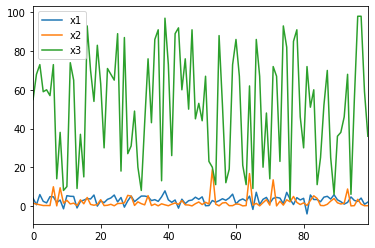

In [58]:
df.plot()

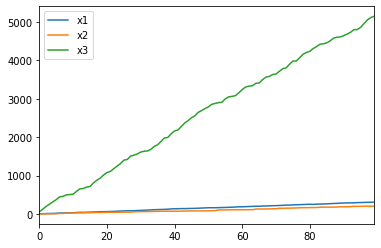

In [59]:
df.apply(np.cumsum).plot()

### (2) 逐列（横向）求幅值（最大值-最小值）

In [60]:
df.apply(lambda x: x.max() - x.min(), axis=0)

x1    11.908954
x2    18.777236
x3    95.000000
dtype: float64

### 例 9.1

In [61]:
class_student = pd.read_excel(r"ch9-namelist.xlsx")
class_student

,序号,学号,姓名,性别,年级,学院,随机分数1,随机分数2
0,1,1650090,施琨健,男,2016,土木工程学院,60,96
1,2,1650176,范致皓,男,2016,环境工程学院,54,73
2,3,1650870,孙仪超,女,2016,土木工程学院,78,69
3,4,1650988,夏佳李,女,2016,土木工程学院,96,91
4,5,1651181,李峰云,男,2016,物理科学学院,81,71
5,6,1651372,席峰程,男,2016,土木工程学院,55,82
6,7,1651400,张裕浩,男,2016,环境工程学院,52,59
7,8,1651940,赵鹏,男,2016,土木工程学院,90,55
8,9,1651941,赵怡心,女,2016,土木工程学院,78,63
9,10,1652009,李宁靖,男,2016,电信学院,91,72


In [62]:
# 比如，要求名字两个字的同学分为A组，名字3个字的男同学分为B组，名字3个字的女同学为C组
def func(dflike,name,sex):
    if len(dflike[name])==2:
        return 'A'
    elif len(dflike[name])>=3 and dflike[sex] == '男':
        return 'B'
    elif len(dflike[name])>=3 and dflike[sex] == '女':
        return 'C'

In [63]:
class_student['分组'] = class_student.apply(func, axis=1, args=('姓名','性别'))
class_student

,序号,学号,姓名,性别,年级,学院,随机分数1,随机分数2,分组
0,1,1650090,施琨健,男,2016,土木工程学院,60,96,B
1,2,1650176,范致皓,男,2016,环境工程学院,54,73,B
2,3,1650870,孙仪超,女,2016,土木工程学院,78,69,C
3,4,1650988,夏佳李,女,2016,土木工程学院,96,91,C
4,5,1651181,李峰云,男,2016,物理科学学院,81,71,B
5,6,1651372,席峰程,男,2016,土木工程学院,55,82,B
6,7,1651400,张裕浩,男,2016,环境工程学院,52,59,B
7,8,1651940,赵鹏,男,2016,土木工程学院,90,55,A
8,9,1651941,赵怡心,女,2016,土木工程学院,78,63,C
9,10,1652009,李宁靖,男,2016,电信学院,91,72,B


In [ ]:
#按照序号被13除的余数，分为13组
def func2(dflike,index):
    strlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    return strlist[(dflike[index]-1)%17]

In [ ]:
class_student['分组2'] = class_student.apply(func2, axis=1, args=('序号',))
class_student

In [ ]:
wbs = {
    "wbs": ["job1", "job2", "job3", "job4"],
    "date_from": ["2019-04-01", "2019-04-07", "2019-05-16","2019-05-20"],
    "date_to": ["2019-05-01", "2019-05-17", "2019-05-31", "2019-06-11"]
}
df = pd.DataFrame(wbs)
df

In [ ]:
# 计算一个工作用了多长时间？

In [ ]:
import datetime as dt

def get_interval_days(arrLike, start, end):   
    start_date = dt.datetime.strptime(arrLike[start], '%Y-%m-%d')
    end_date = dt.datetime.strptime(arrLike[end], '%Y-%m-%d') 

    return (end_date - start_date).days

In [ ]:
df['elapsed'] = df.apply(get_interval_days, axis=1, args=('date_from', 'date_to'))

In [ ]:
df

## 9.3 统计直方图 —— 序列元素的频数

- 语法
```python
s>>> pd.Serie.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
```


- 功能 —— 统计元素数目


- 参数
    - normalize —— 缺省值 False，如果为 True，则求相对频率
    - sort —— 缺省值 True，表示排序
    - ascending —— 缺省值 False
    - bins —— 分箱

In [64]:
s = pd.Series(np.random.randint(0,20, size=1000))
s

0      17
1      14
2      19
3      15
4      17
       ..
995     1
996     1
997     1
998     2
999     4
Length: 1000, dtype: int32

In [65]:
s.value_counts(normalize=False)

19    62
7     59
11    57
13    56
9     56
15    56
16    54
2     53
6     51
4     49
3     49
1     49
10    48
0     48
8     45
17    45
5     44
14    42
12    40
18    37
dtype: int64

In [66]:
s.value_counts(bins=20)

(18.05, 19.0]    62
(6.65, 7.6]      59
(10.45, 11.4]    57
(12.35, 13.3]    56
(8.55, 9.5]      56
(14.25, 15.2]    56
(15.2, 16.15]    54
(1.9, 2.85]      53
(5.7, 6.65]      51
(3.8, 4.75]      49
(2.85, 3.8]      49
(0.95, 1.9]      49
(9.5, 10.45]     48
(-0.02, 0.95]    48
(7.6, 8.55]      45
(16.15, 17.1]    45
(4.75, 5.7]      44
(13.3, 14.25]    42
(11.4, 12.35]    40
(17.1, 18.05]    37
dtype: int64

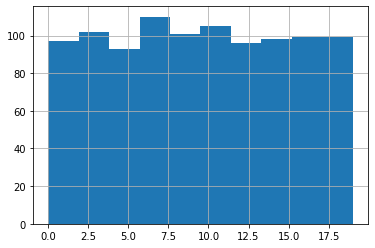

In [67]:
s.hist()

## 9.4 合并对象

- 语法
```python
>>> pd.concat(objs, axis=0, join='outer',
              join_axes=None, ignore_index=False, keys=None, levels=None,
              names=None, verify_integrity=False, sort=None, copy=True)
```


- 功能
    - 连结 Pandas 对象，沿特定轴向


- 参数
    - objs —— 对象（Series, DataFrame, dict）序列
    - axis —— 轴向
    - 其它 —— 略

### 9.4.1 多个数据帧准备

In [ ]:
df1 = pd.DataFrame(np.random.randn(5,4), index=["row_"+str(i) for i in range(5)], columns=["col_"+str(j) for j in range(4)])
df1

In [ ]:
df2 = pd.DataFrame(np.random.randn(3,4), index=["row_"+str(i) for i in range(5,8)], columns=["col_"+str(j) for j in range(4)])
df2

### 9.4.2 合并多数据帧

In [ ]:
df = pd.concat([df1,df2])
df

## 9.5 图形可视化

- 序列 自带图形函数

```python
>>> ts.plot(kind='line', ax=None, figsize=None, use_index=True, title=None,
            grid=None, legend=False, style=None, logx=False,
            logy=False, loglog=False, xticks=None, yticks=None,
            xlim=None, ylim=None, rot=None, fontsize=None,
            colormap=None, table=False, yerr=None, xerr=None,
            label=None, secondary_y=False, **kwds)
>>> ts.plot.bar()
>>> ts.plot.hist()
>>> ts.plot.line()
```


- 功能与参数介绍 ——　第11讲

### 9.5.1 随时间变化的序列

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.plot()

In [ ]:
ts

### 9.5.2 累积求和

In [ ]:
ts_sum = ts.cumsum()
ts_sum.plot()

### 9.5.3 直方图

In [ ]:
ts_sum.plot.hist()

## 9.6 案例1-windspeed

In [3]:
windspeed = pd.read_excel("windspeed.xlsx",header=None, \
                          names = ["year","month","day","Uday","Umean","Umeandir","Umax","Umaxdir"])
windspeed

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
0,1953,1,1,163.0,NaN,NaN,NaN,NaN
1,1953,1,2,137.0,NaN,NaN,NaN,NaN
2,1953,1,3,150.0,NaN,NaN,NaN,NaN
3,1953,1,4,103.0,NaN,NaN,NaN,NaN
4,1953,1,5,80.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22974,2015,11,26,36.0,53.0,2.0,104.0,1.0
22975,2015,11,27,47.0,63.0,1.0,126.0,3.0
22976,2015,11,28,53.0,65.0,1.0,121.0,1.0
22977,2015,11,29,24.0,52.0,1.0,99.0,1.0


In [4]:
windspeed.describe()

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
count,22979.000000,22979.000000,22979.000000,22975.000000,16300.000000,16292.000000,4716.000000,4714.000000
mean,1983.958179,6.515688,15.728839,54.935365,78.158160,4.752087,106.927057,5.016971
std,18.160617,3.445187,8.799899,29.070255,27.319743,3.736352,32.334732,4.108197
min,1953.000000,1.000000,1.000000,0.000000,18.000000,1.000000,34.000000,1.000000
25%,1968.000000,4.000000,8.000000,33.000000,59.000000,2.000000,84.000000,2.000000
50%,1984.000000,7.000000,16.000000,50.000000,73.000000,3.000000,106.000000,3.000000
75%,2000.000000,10.000000,23.000000,70.000000,93.000000,8.000000,128.000000,9.000000
max,2015.000000,12.000000,31.000000,245.000000,290.000000,16.000000,363.000000,16.000000


In [5]:
import numpy as np
mean_U_dir = np.zeros(17,)
for i in range(1,17):
    mean_U_dir[i-1] = windspeed[windspeed['Umeandir']==i]['Umean'].max()/10
mean_U_dir[16] = mean_U_dir[0]
mean_U_dir

array([29. , 26. , 26.5, 23.3, 14.3, 13. , 16.3, 17.7, 25. , 20. , 16.7,
       16. ,  9. , 13.5, 12.7, 24. , 29. ])

In [70]:
angle = np.array(range(0,3800,225))/10
angle

array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ,
       202.5, 225. , 247.5, 270. , 292.5, 315. , 337.5, 360. ])

In [6]:
angle = np.array(range(0,3800,225))/10+11.25
angle = angle /180 *np.pi
angle

array([0.19634954, 0.58904862, 0.9817477 , 1.37444679, 1.76714587,
       2.15984495, 2.55254403, 2.94524311, 3.33794219, 3.73064128,
       4.12334036, 4.51603944, 4.90873852, 5.3014376 , 5.69413668,
       6.08683577, 6.47953485])

In [7]:
import matplotlib.pyplot as plt
plt.plot(angle,mean_U_dir)
plt.show()

<Figure size 640x480 with 1 Axes>

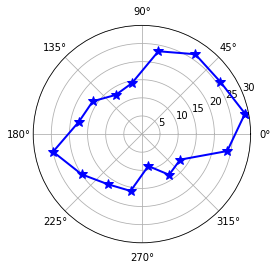

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.polar(angle, mean_U_dir, color="blue", linewidth=2,
          marker="*", mfc="b", ms=10)

plt.show()

In [9]:
import numpy as np
max_U_dir = np.zeros(17,)
for i in range(1,17):
    max_U_dir[i-1] = windspeed[windspeed['Umaxdir']==i]['Umax'].max()/10
max_U_dir[16] = max_U_dir[0]
max_U_dir

array([36.3, 32.7, 26.6, 24.3, 16.8, 15.9, 14.9, 18. , 13.3, 25.5, 30.2,
       16.2, 15.2, 18.4, 17.6, 29.8, 36.3])

In [10]:
ax.set_theta_direction?

Object `ax.set_theta_direction` not found.


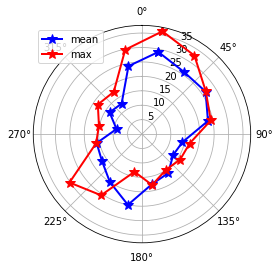

In [11]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
plt.polar(angle, mean_U_dir, color="blue", linewidth=2,
          marker="*", mfc="b", ms=10)
plt.polar(angle, max_U_dir, color="red", linewidth=2,
          marker="*", mfc="r", ms=10)
plt.legend(['mean', 'max'])
ax.set_theta_zero_location('N',offset=0)  #设置N方向为0度
ax.set_theta_direction(-1) # 顺时针方向编号0 1 2 3 4 5 ~ 15
plt.show()

In [12]:
# why 蓝色> 红色？

In [13]:
windspeed2 = windspeed.dropna()
windspeed2.describe()

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
count,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000
mean,2008.958625,6.487588,15.726713,36.998090,61.201782,4.892213,106.922130,5.017823
std,3.721266,3.430969,8.803409,14.018746,15.847005,3.848336,32.337449,4.108216
min,2003.000000,1.000000,1.000000,0.000000,18.000000,1.000000,34.000000,1.000000
25%,2006.000000,4.000000,8.000000,26.000000,50.000000,2.000000,84.000000,2.000000
50%,2009.000000,7.000000,16.000000,36.000000,61.000000,3.000000,106.000000,3.000000
75%,2012.000000,9.000000,23.000000,46.000000,71.000000,8.000000,128.000000,9.000000
max,2015.000000,12.000000,31.000000,126.000000,172.000000,16.000000,363.000000,16.000000


In [14]:
mean_U_dir = np.zeros(17,)
for i in range(1,17):
    mean_U_dir[i-1] = windspeed2[windspeed2['Umeandir']==i]['Umean'].max()/10
mean_U_dir[16] = mean_U_dir[0]
max_U_dir = np.zeros(17,)
for i in range(1,17):
    max_U_dir[i-1] = windspeed2[windspeed2['Umaxdir']==i]['Umax'].max()/10
max_U_dir[16] = max_U_dir[0]


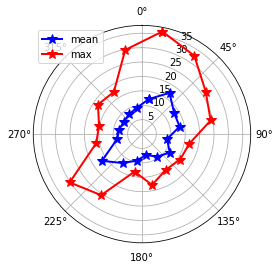

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
plt.polar(angle, mean_U_dir, color="blue", linewidth=2,
          marker="*", mfc="b", ms=10)
plt.polar(angle, max_U_dir, color="red", linewidth=2,
          marker="*", mfc="r", ms=10)
plt.legend(['mean', 'max'])
ax.set_theta_zero_location('N',offset=0)  #设置N方向为0度
ax.set_theta_direction(-1) # 顺时针方向编号0 1 2 3 4 5 ~ 15
plt.show()

In [16]:
plt.polar?

In [17]:
wind_year = windspeed.groupby('year').describe()
wind_year

month                                                    day             \
      count      mean       std  min  25%  50%    75%   max  count       mean   
year                                                                            
1953  365.0  6.526027  3.452584  1.0  4.0  7.0  10.00  12.0  365.0  15.720548   
1954  365.0  6.526027  3.452584  1.0  4.0  7.0  10.00  12.0  365.0  15.720548   
1955  365.0  6.526027  3.452584  1.0  4.0  7.0  10.00  12.0  365.0  15.720548   
1956  366.0  6.513661  3.455958  1.0  4.0  7.0   9.75  12.0  366.0  15.756831   
1957  365.0  6.526027  3.452584  1.0  4.0  7.0  10.00  12.0  365.0  15.720548   
...     ...       ...       ...  ...  ...  ...    ...   ...    ...        ...   
2011  365.0  6.526027  3.452584  1.0  4.0  7.0  10.00  12.0  365.0  15.720548   
2012  366.0  6.513661  3.455958  1.0  4.0  7.0   9.75  12.0  366.0  15.756831   
2013  365.0  6.526027  3.452584  1.0  4.0  7.0  10.00  12.0  365.0  15.720548   
2014  365.0  6.526027  3.452584  1.0  4.0  7.0  10.00  12.0  365.0  15.720548   
2015  334.0  6.017964  3.159376  1.0  3.0  6.0   9.00  11.0  334.0  15.694611   

      ...    Umax        Umaxdir                                           \
      ...     75%    max   count      mean       std  min  25%  50%   75%   
year  ...                                                                   
1953  ...     NaN    NaN     0.0       NaN       NaN  NaN  NaN  NaN   NaN   
1954  ...     NaN    NaN     0.0       NaN       NaN  NaN  NaN  NaN   NaN   
1955  ...     NaN    NaN     0.0       NaN       NaN  NaN  NaN  NaN   NaN   
1956  ...     NaN    NaN     0.0       NaN       NaN  NaN  NaN  NaN   NaN   
1957  ...     NaN    NaN     0.0       NaN       NaN  NaN  NaN  NaN   NaN   
...   ...     ...    ...     ...       ...       ...  ...  ...  ...   ...   
2011  ...  135.00  222.0   365.0  5.095890  3.820004  1.0  2.0  3.0   7.0   
2012  ...  128.75  205.0   366.0  4.226776  4.112852  1.0  1.0  2.0   4.0   
2013  ...  114.00  302.0   365.0  4.594521  4.239398  1.0  1.0  2.0   9.0   
2014  ...   98.00  172.0   365.0  4.865753  4.530853  1.0  1.0  3.0   9.0   
2015  ...  105.00  363.0   333.0  5.561562  4.868756  1.0  1.0  3.0  10.0   

            
       max  
year        
1953   NaN  
1954   NaN  
1955   NaN  
1956   NaN  
1957   NaN  
...    ...  
2011  16.0  
2012  16.0  
2013  16.0  
2014  16.0  
2015  16.0  

[63 rows x 56 columns]

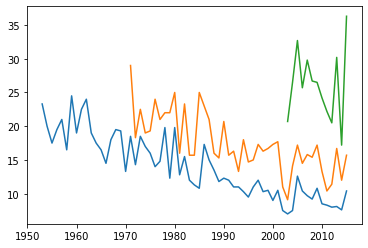

In [18]:
import matplotlib.pyplot as plt
plt.plot(wind_year['Uday']['max']/10)
plt.plot(wind_year['Umean']['max']/10)
plt.plot(wind_year['Umax']['max']/10)
plt.show()

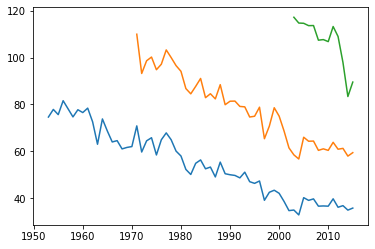

In [19]:
import matplotlib.pyplot as plt
plt.plot(wind_year['Uday']['mean'])
plt.plot(wind_year['Umean']['mean'])
plt.plot(wind_year['Umax']['mean'])
plt.show()

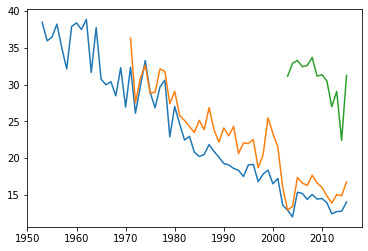

In [20]:
import matplotlib.pyplot as plt
plt.plot(wind_year['Uday']['std'])
plt.plot(wind_year['Umean']['std'])
plt.plot(wind_year['Umax']['std'])
plt.show()

In [21]:
wind_month = windspeed.groupby('month').describe()
wind_month

year                                                             \
        count    mean        std     min     25%     50%     75%     max   
month                                                                      
1      1953.0  1984.0  18.188900  1953.0  1968.0  1984.0  2000.0  2015.0   
2      1779.0  1984.0  18.181933  1953.0  1968.0  1984.0  2000.0  2015.0   
3      1953.0  1984.0  18.188900  1953.0  1968.0  1984.0  2000.0  2015.0   
4      1890.0  1984.0  18.189055  1953.0  1968.0  1984.0  2000.0  2015.0   
5      1953.0  1984.0  18.188900  1953.0  1968.0  1984.0  2000.0  2015.0   
6      1890.0  1984.0  18.189055  1953.0  1968.0  1984.0  2000.0  2015.0   
7      1953.0  1984.0  18.188900  1953.0  1968.0  1984.0  2000.0  2015.0   
8      1953.0  1984.0  18.188900  1953.0  1968.0  1984.0  2000.0  2015.0   
9      1890.0  1984.0  18.189055  1953.0  1968.0  1984.0  2000.0  2015.0   
10     1953.0  1984.0  18.188900  1953.0  1968.0  1984.0  2000.0  2015.0   
11     1890.0  1984.0  18.189055  1953.0  1968.0  1984.0  2000.0  2015.0   
12     1922.0  1983.5  17.900187  1953.0  1968.0  1983.5  1999.0  2014.0   

          day            ...   Umax        Umaxdir                           \
        count      mean  ...    75%    max   count      mean       std  min   
month                    ...                                                  
1      1953.0  16.00000  ...  136.0  179.0   403.0  3.193548  3.142116  1.0   
2      1779.0  14.62226  ...  132.5  176.0   365.0  3.613699  3.339133  1.0   
3      1953.0  16.00000  ...  126.0  169.0   403.0  4.178660  3.636854  1.0   
4      1890.0  15.50000  ...  118.0  178.0   390.0  5.212821  4.283446  1.0   
5      1953.0  16.00000  ...  111.5  187.0   403.0  5.888337  4.224418  1.0   
6      1890.0  15.50000  ...  118.0  194.0   390.0  7.894872  4.023290  1.0   
7      1953.0  16.00000  ...  120.0  327.0   403.0  8.781638  3.744576  1.0   
8      1953.0  16.00000  ...  112.0  363.0   403.0  7.119107  4.118362  1.0   
9      1890.0  15.50000  ...  124.0  267.0   390.0  4.187179  3.134244  1.0   
10     1953.0  16.00000  ...  142.0  298.0   402.0  2.875622  2.333632  1.0   
11     1890.0  15.50000  ...  140.0  211.0   390.0  3.802564  3.952090  1.0   
12     1922.0  16.00000  ...  136.0  191.0   372.0  3.212366  3.187840  1.0   

                              
       25%   50%   75%   max  
month                         
1      2.0   2.0   3.0  16.0  
2      2.0   3.0   4.0  16.0  
3      2.0   3.0   4.0  16.0  
4      2.0   3.0  10.0  16.0  
5      2.0   4.0  10.0  16.0  
6      3.0  10.0  11.0  14.0  
7      6.0  10.0  11.0  16.0  
8      3.0   7.0  11.0  16.0  
9      2.0   3.0   5.0  16.0  
10     2.0   2.0   3.0  16.0  
11     2.0   2.0   4.0  16.0  
12     2.0   2.0   3.0  16.0  

[12 rows x 56 columns]

In [22]:
type(wind_month)

pandas.core.frame.DataFrame

In [23]:
wind_month["Umax"].max

<bound method DataFrame.max of        count        mean        std   min     25%    50%    75%    max
month                                                                 
1      403.0  115.511166  28.531413  35.0   97.50  119.0  136.0  179.0
2      367.0  110.125341  31.126405  37.0   88.00  113.0  132.5  176.0
3      403.0  105.796526  28.826006  34.0   85.00  107.0  126.0  169.0
4      390.0   98.623077  26.805382  36.0   80.00   98.5  118.0  178.0
5      403.0   93.863524  26.957563  39.0   73.50   93.0  111.5  187.0
6      390.0   99.541026  27.162031  34.0   80.00  102.5  118.0  194.0
7      403.0  103.913151  33.821008  39.0   81.50  101.0  120.0  327.0
8      403.0   98.426799  38.093450  35.0   73.00   91.0  112.0  363.0
9      390.0  103.497436  37.821102  36.0   74.00   99.5  124.0  267.0
10     402.0  121.350746  32.576308  45.0  100.00  118.0  142.0  298.0
11     390.0  117.505128  31.110281  39.0   95.00  118.5  140.0  211.0
12     372.0  115.690860  28.878286  38.0   98

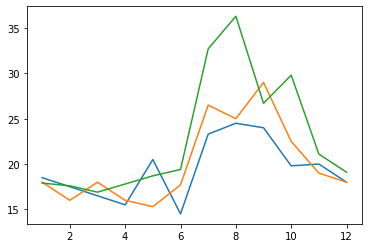

In [24]:
import matplotlib.pyplot as plt
plt.plot(wind_month['Uday']['max']/10)
plt.plot(wind_month['Umean']['max']/10)
plt.plot(wind_month['Umax']['max']/10)
plt.show()

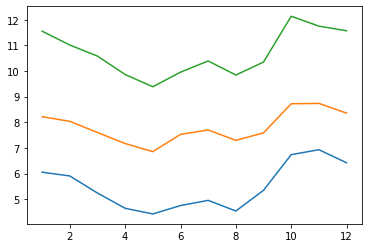

In [25]:
import matplotlib.pyplot as plt
plt.plot(wind_month['Uday']['mean']/10)
plt.plot(wind_month['Umean']['mean']/10)
plt.plot(wind_month['Umax']['mean']/10)
plt.show()

In [26]:
## Predicting maximum wind speed in 100 years
Umean = windspeed['Umean']
Umean.dropna()
Umean.describe()

count    16300.000000
mean        78.158160
std         27.319743
min         18.000000
25%         59.000000
50%         73.000000
75%         93.000000
max        290.000000
Name: Umean, dtype: float64

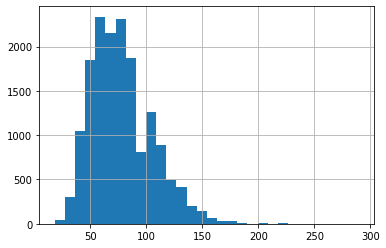

In [27]:
Umean.hist(bins=30)

In [28]:
from scipy.optimize import curve_fit

In [29]:
from scipy.stats import gumbel_r

- 极值分布的概念
https://baike.baidu.com/item/%E6%9E%81%E5%80%BC%E5%88%86%E5%B8%83/10374610?fr=aladdin

- Gumbel distribution
- model the distribution of the maximum (or the minimum) of a number of samples of various distributions.
<img src='images\ch09\gumbel.png' width=400>

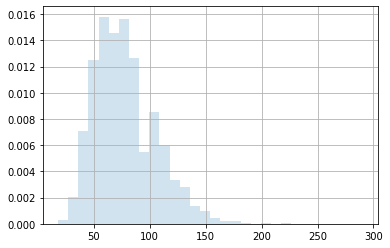

In [30]:
fig, ax = plt.subplots(1, 1)
Umean.hist(bins=30, density=True, histtype='stepfilled', alpha=0.2)



In [31]:
fitresult = gumbel_r.fit(Umean, loc=78, scale=27)
fitresult

C:\Users\solit\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
C:\Users\solit\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


(63.50723948863384, 17.759101791992528)

In [32]:
Umean_wo_na = Umean.dropna()

In [33]:
Umean_wo_na.describe()

count    16300.000000
mean        78.158160
std         27.319743
min         18.000000
25%         59.000000
50%         73.000000
75%         93.000000
max        290.000000
Name: Umean, dtype: float64

In [34]:
fitresult = gumbel_r.fit(Umean_wo_na, loc=78, scale=27)
fitresult

(65.60330552470721, 21.949519010348045)

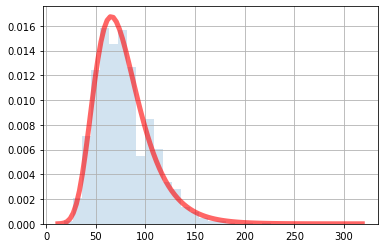

In [35]:
fig, ax = plt.subplots(1, 1)
Umean.hist(bins=30, density=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(gumbel_r.ppf(0.00001, fitresult[0],fitresult[1]),gumbel_r.ppf(0.99999, fitresult[0],fitresult[1]), 100)
ax.plot(x, gumbel_r.pdf(x, fitresult[0],fitresult[1]),'r-', lw= 5, alpha= 0.6, label='gumber_l pdf')
#ppf(q, loc=0, scale=1)

In [36]:
day_100year = 100*365
prob = 1/day_100year


In [37]:
gumbel_r.ppf(1-prob, loc=fitresult[0], scale=fitresult[1])/10

29.618418450769752

In [38]:
Umean.max()

290.0

In [39]:
gumbel_r.fit?

In [40]:
###########


C:\Users\solit\Anaconda3\lib\site-packages\pandas\core\series.py:4784: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)
C:\Users\solit\Anaconda3\lib\site-packages\pandas\core\series.py:3194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


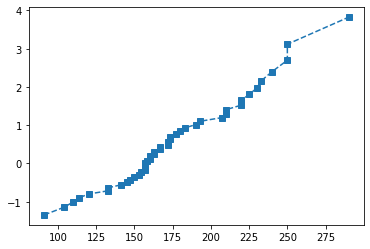

In [41]:
wind_year_Umean_max = wind_year['Umean']['max']
wind_year_Umean_max.dropna(inplace=True)
wind_year_Umean_max.sort_values(inplace=True)
n = wind_year_Umean_max.size

wind_year_prob = pd.DataFrame(wind_year_Umean_max)
wind_year_prob2 = pd.DataFrame(np.arange(1,n+1)/(n+1))

#plt.plot(wind_year_prob,-np.log(-1*np.log(wind_year_prob2)),'--s')   #-ln(-ln(F)) 与  (U-miu)/beta 
plt.plot(wind_year_Umean_max,-np.log(-1*np.log(np.arange(1,n+1)/(n+1))),'--s')   #-ln(-ln(F)) 与  (U-miu)/beta 


In [42]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, wind_year_Umean_max,-np.log(-1*np.log(np.arange(1,n+1)/(n+1))))
popt, pcov

(array([ 0.02712694, -4.19126781]), array([[ 4.14946814e-07, -7.24681559e-05],
        [-7.24681559e-05,  1.33865808e-02]]))

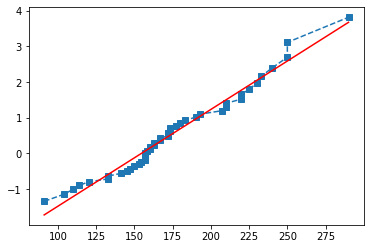

In [43]:
plt.plot(wind_year_Umean_max,-np.log(-1*np.log(np.arange(1,n+1)/(n+1))),'--s')   #-ln(-ln(F)) 与  (U-miu)/beta 
plt.plot(wind_year_Umean_max,wind_year_Umean_max*popt[0]+popt[1],'-r')

In [44]:
U_predicted = (-np.log(-1*np.log(1-1/100)) - popt[1])/popt[0]
U_predicted/10

32.40843496313506